**Introduction**

Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused smart products. Sršen used her background as an artist to develop beautifully designed technology that informs and inspires women around the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.

**Business Task**

Analyzing smart device fitness data could help unlock new growth opportunities for the company. Focusing on one of the Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights we discover will then help guide marketing strategy for the company.

**Stakeholders**

* Primary
1. Urška Sršen, cofounder and Chief Creative Officer
2. Sando Mur, cofounder
* Secondary
1. Bellabeat marketing analytics team

**Data Source**

FitBit Fitness Tracker Data https://www.kaggle.com/arashnic/fitbit (CC0: Public Domain, dataset made available through Mobius): This Kaggle data set contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

**Installing and loading common packages and libraries**

In [51]:
import pandas as pd  # for dataframe
import numpy as np
import matplotlib.pyplot as plt  # for plots
import seaborn as sns
%matplotlib inline
import os

In [52]:
pip install -U pandasql

Note: you may need to restart the kernel to use updated packages.


In [53]:
from pandasql import sqldf  # for performing queries on dataframe

In [54]:
mysql = lambda q: sqldf(q, globals())

**STEP 1: COLLECT DATA**

Loading the CSV files

Here we’ll create a dataframe named ‘daily_activity’ and read in one of the CSV files from the dataset. We’ll create another dataframes for the sleep data, daily steps and daily calories

In [55]:
os.chdir("C:\\Users\\AkshayT\\Desktop\\Google\\Bellabeat_case_study_python")

In [56]:
daily_activity = pd.read_csv("dailyActivity_merged.csv")
sleep_day = pd.read_csv("sleepDay_merged.csv")
daily_steps = pd.read_csv("dailySteps_merged.csv")
daily_calories = pd.read_csv("dailyCalories_merged.csv")

Take a look at the

In [57]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [58]:
sleep_day.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [59]:
daily_steps.head()

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


In [60]:
daily_calories.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


Identify all the columns in the daily_activity, sleep_day, daily_calories and daily_steps data.

In [61]:
daily_activity.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [62]:
sleep_day.columns

Index(['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed'],
      dtype='object')

In [63]:
daily_steps.columns

Index(['Id', 'ActivityDay', 'StepTotal'], dtype='object')

In [64]:
daily_calories.columns

Index(['Id', 'ActivityDay', 'Calories'], dtype='object')

**STEP 2: CLEAN UP AND ADD DATA TO PREPARE FOR ANALYSIS**

In [65]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [66]:
sleep_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


daily_steps.info()

In [67]:
daily_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   Calories     940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


**Convert columns into appropriate data types**

As we have noticed ActivityDate column in daily_activity is in character data type, let’s convert it into date similarly SleepDay column in sleep_day and ActivityDay column in both daily_calories and daily_steps

In [68]:
daily_activity.ActivityDate = pd.to_datetime(daily_activity.ActivityDate, format='%m/%d/%Y')

In [69]:
sleep_day.SleepDay = pd.to_datetime(sleep_day.SleepDay, format='%m/%d/%Y %H:%M:%S %p').dt.date

In [70]:
sleep_day.SleepDay = sleep_day.SleepDay.astype('datetime64[ns]')

In [71]:
daily_steps.ActivityDay = pd.to_datetime(daily_steps.ActivityDay, format='%m/%d/%Y')

In [72]:
daily_calories.ActivityDay = pd.to_datetime(daily_calories.ActivityDay, format='%m/%d/%Y')

Let’s Check the data

In [73]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [74]:
sleep_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   SleepDay            413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 16.3 KB


In [75]:
daily_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Id           940 non-null    int64         
 1   ActivityDay  940 non-null    datetime64[ns]
 2   StepTotal    940 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 22.2 KB


In [76]:
daily_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Id           940 non-null    int64         
 1   ActivityDay  940 non-null    datetime64[ns]
 2   Calories     940 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 22.2 KB


Let’s convert Id column in each dataframe into character as we are not going to do any calculations on Id

In [77]:
daily_activity.Id = daily_activity.Id.astype('str')

In [78]:
sleep_day.Id = sleep_day.Id.astype('str')

In [79]:
daily_steps.Id = daily_steps.Id.astype('str')

In [80]:
daily_calories.Id = daily_calories.Id.astype('str')

Let’s Check The Data

In [81]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    object        
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [82]:
sleep_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    object        
 1   SleepDay            413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 16.3+ KB


In [83]:
daily_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Id           940 non-null    object        
 1   ActivityDay  940 non-null    datetime64[ns]
 2   StepTotal    940 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 22.2+ KB


In [84]:
daily_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Id           940 non-null    object        
 1   ActivityDay  940 non-null    datetime64[ns]
 2   Calories     940 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 22.2+ KB


We have observed that all the data in daily_calories and daily_steps dataframe is also present in daily_activity so we can ignore these two dataframes

Let’s join tables daily_activity and sleep_day so that we can do analysis in a better way We are going to join these two tables based on Id and ActivityDate(SleepDay in sleep_day) We are going to take certain important columns from these two tables which are important for our analysis

In [85]:
query = '''
SELECT ac.Id, ac.ActivityDate, ac.TotalSteps
      , ac.TotalDistance, ac.SedentaryMinutes, ac.Calories, sl.TotalSleepRecords
      , sl.TotalMinutesAsleep, sl.TotalTimeInBed FROM daily_activity ac
      INNER JOIN sleep_day sl
      ON ac.Id = sl.Id
      AND ac.ActivityDate = sl.SleepDay
      '''
activity_sleep_combined = mysql(query)
mysql(query)

,Id,ActivityDate,TotalSteps,TotalDistance,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12 00:00:00.000000,13162,8.50,728,1985,1,327,346
1,1503960366,2016-04-13 00:00:00.000000,10735,6.97,776,1797,2,384,407
2,1503960366,2016-04-15 00:00:00.000000,9762,6.28,726,1745,1,412,442
3,1503960366,2016-04-16 00:00:00.000000,12669,8.16,773,1863,2,340,367
4,1503960366,2016-04-17 00:00:00.000000,9705,6.48,539,1728,1,700,712
...,...,...,...,...,...,...,...,...,...
408,8792009665,2016-04-30 00:00:00.000000,7174,4.59,749,2896,1,343,360
409,8792009665,2016-05-01 00:00:00.000000,1619,1.04,834,1962,1,503,527
410,8792009665,2016-05-02 00:00:00.000000,1831,1.17,916,2015,1,415,423
411,8792009665,2016-05-03 00:00:00.000000,2421,1.55,739,2297,1,516,545


Let's Check The Data

In [86]:
activity_sleep_combined.ActivityDate = pd.to_datetime(activity_sleep_combined.ActivityDate, format='%Y-%m-%d %H:%M:%S')

In [87]:
activity_sleep_combined.head()

,Id,ActivityDate,TotalSteps,TotalDistance,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,728,1985,1,327,346
1,1503960366,2016-04-13,10735,6.97,776,1797,2,384,407
2,1503960366,2016-04-15,9762,6.28,726,1745,1,412,442
3,1503960366,2016-04-16,12669,8.16,773,1863,2,340,367
4,1503960366,2016-04-17,9705,6.48,539,1728,1,700,712


In [88]:
activity_sleep_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    object        
 1   ActivityDate        413 non-null    datetime64[ns]
 2   TotalSteps          413 non-null    int64         
 3   TotalDistance       413 non-null    float64       
 4   SedentaryMinutes    413 non-null    int64         
 5   Calories            413 non-null    int64         
 6   TotalSleepRecords   413 non-null    int64         
 7   TotalMinutesAsleep  413 non-null    int64         
 8   TotalTimeInBed      413 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 29.2+ KB


The data can only be aggregated at the Id-level, which is too granular. We will want to add some additional columns of data – such as day, month that provide additional opportunities to aggregate the data.

Add columns that list the date and month of the dataframe

This will allow us to aggregate data for each month, day before completing these operations we could only aggregate at the level

In [89]:
activity_sleep_combined['day'] = pd.to_datetime(activity_sleep_combined.ActivityDate).dt.day

In [90]:
activity_sleep_combined['month'] = pd.to_datetime(activity_sleep_combined.ActivityDate).dt.month

In [91]:
activity_sleep_combined['day_of_week'] = pd.to_datetime(activity_sleep_combined.ActivityDate).dt.day_name()

Let's check the data

In [92]:
activity_sleep_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    object        
 1   ActivityDate        413 non-null    datetime64[ns]
 2   TotalSteps          413 non-null    int64         
 3   TotalDistance       413 non-null    float64       
 4   SedentaryMinutes    413 non-null    int64         
 5   Calories            413 non-null    int64         
 6   TotalSleepRecords   413 non-null    int64         
 7   TotalMinutesAsleep  413 non-null    int64         
 8   TotalTimeInBed      413 non-null    int64         
 9   day                 413 non-null    int64         
 10  month               413 non-null    int64         
 11  day_of_week         413 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(8), object(2)
memory usage: 38.8+ KB


In [93]:
activity_sleep_combined.head()

,Id,ActivityDate,TotalSteps,TotalDistance,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,day,month,day_of_week
0,1503960366,2016-04-12,13162,8.50,728,1985,1,327,346,12,4,Tuesday
1,1503960366,2016-04-13,10735,6.97,776,1797,2,384,407,13,4,Wednesday
2,1503960366,2016-04-15,9762,6.28,726,1745,1,412,442,15,4,Friday
3,1503960366,2016-04-16,12669,8.16,773,1863,2,340,367,16,4,Saturday
4,1503960366,2016-04-17,9705,6.48,539,1728,1,700,712,17,4,Sunday


**Understanding some summary statistics**

How many unique participants are there in each dataframe? It looks like there may be more participants in the daily activity dataset than the sleep dataset.

In [94]:
activity_sleep_combined.describe()

,TotalSteps,TotalDistance,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,day,month
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,8541.140436,6.038620,712.169492,2397.573850,1.118644,419.467312,458.639225,15.777240,4.358354
std,4156.926990,3.051998,165.957432,762.886326,0.345521,118.344679,127.101607,8.704634,0.480098
min,17.000000,0.010000,0.000000,257.000000,1.000000,58.000000,61.000000,1.000000,4.000000
25%,5206.000000,3.600000,631.000000,1850.000000,1.000000,361.000000,403.000000,8.000000,4.000000
50%,8925.000000,6.290000,717.000000,2220.000000,1.000000,433.000000,463.000000,16.000000,4.000000
75%,11393.000000,8.030000,783.000000,2926.000000,1.000000,490.000000,526.000000,23.000000,5.000000
max,22770.000000,17.540001,1265.000000,4900.000000,3.000000,796.000000,961.000000,30.000000,5.000000


**STEP 3: CONDUCT DESCRIPTIVE ANALYSIS**

Let’s do some quick summary statistics we’d want to know about combined data frame

For the activity_sleep_combined data frame

Let’s aggregate the data

Let’s aggregate based on Id



In [95]:
activity_sleep_combined.groupby("Id")[['TotalSteps', 'TotalDistance', 'SedentaryMinutes', 'Calories', 
                                      'TotalMinutesAsleep', 'TotalTimeInBed']].mean().add_prefix('avg_')

,avg_TotalSteps,avg_TotalDistance,avg_SedentaryMinutes,avg_Calories,avg_TotalMinutesAsleep,avg_TotalTimeInBed
Id,,,,,,
1503960366,12405.680000,7.971200,759.280000,1872.280000,360.280000,383.200000
1644430081,7967.750000,5.792500,920.500000,2977.750000,294.000000,346.000000
1844505072,3477.000000,2.303333,443.333333,1676.333333,652.000000,961.000000
1927972279,1490.000000,1.032000,977.200000,2316.200000,417.000000,437.800000
2026352035,5618.678571,3.487143,653.964286,1540.785714,506.178571,537.642857
2320127002,5079.000000,3.420000,1129.000000,1804.000000,61.000000,69.000000
2347167796,8533.200000,5.681333,628.400000,1971.333333,446.800000,491.333333
3977333714,11218.000000,7.676071,716.214286,1560.392857,293.642857,461.142857
4020332650,6596.750000,4.731250,841.875000,3195.000000,349.375000,379.750000


Let’s aggregate based on day_of_week

In [96]:
activity_sleep_combined.groupby('day_of_week')[['TotalSteps', 'TotalDistance', 'SedentaryMinutes', 'Calories', 
                                      'TotalMinutesAsleep', 'TotalTimeInBed']].mean().add_prefix('avg_')

,avg_TotalSteps,avg_TotalDistance,avg_SedentaryMinutes,avg_Calories,avg_TotalMinutesAsleep,avg_TotalTimeInBed
day_of_week,,,,,,
Friday,7901.403509,5.511930,743.087719,2329.649123,405.421053,445.052632
Monday,9339.851064,6.611064,717.851064,2465.446809,418.829787,456.170213
Saturday,9948.689655,7.095690,678.655172,2527.172414,420.810345,461.275862
Sunday,7297.854545,5.184727,687.636364,2276.600000,452.745455,503.509091
Thursday,8205.353846,5.798154,701.415385,2315.784615,402.369231,435.800000
Tuesday,9182.692308,6.430000,740.046154,2496.200000,404.538462,443.292308
Wednesday,8022.863636,5.719849,714.454545,2378.242424,434.681818,470.030303


Notice that the days of the week are out of order. Let’s fix that

In [97]:
from pandas.api.types import CategoricalDtype
cats = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
cat_type = CategoricalDtype(categories=cats, ordered=True)
activity_sleep_combined.day_of_week = activity_sleep_combined.day_of_week.astype(cat_type)

Now again let’s aggregate based on day_of_week

In [98]:
activity_sleep_combined.groupby('day_of_week')[['TotalSteps', 'TotalDistance', 'SedentaryMinutes', 'Calories', 
                                      'TotalMinutesAsleep', 'TotalTimeInBed']].mean().add_prefix('avg_')

,avg_TotalSteps,avg_TotalDistance,avg_SedentaryMinutes,avg_Calories,avg_TotalMinutesAsleep,avg_TotalTimeInBed
day_of_week,,,,,,
Sunday,7297.854545,5.184727,687.636364,2276.600000,452.745455,503.509091
Monday,9339.851064,6.611064,717.851064,2465.446809,418.829787,456.170213
Tuesday,9182.692308,6.430000,740.046154,2496.200000,404.538462,443.292308
Wednesday,8022.863636,5.719849,714.454545,2378.242424,434.681818,470.030303
Thursday,8205.353846,5.798154,701.415385,2315.784615,402.369231,435.800000
Friday,7901.403509,5.511930,743.087719,2329.649123,405.421053,445.052632
Saturday,9948.689655,7.095690,678.655172,2527.172414,420.810345,461.275862


**STEP 4: ViSUALIZE THE DATA**

Let’s Determine how many average steps consumers take on each day

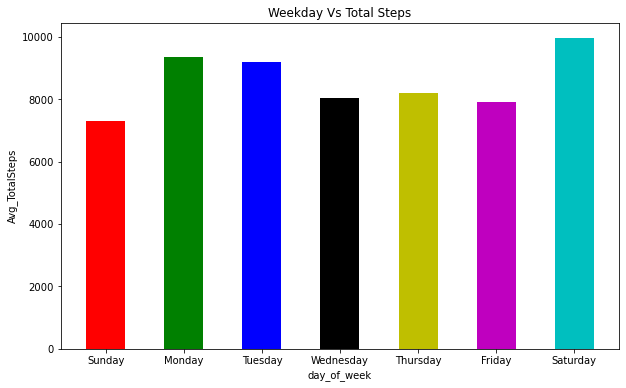

In [99]:
plt.figure(figsize=(10,6))
w = 0.5
x = activity_sleep_combined.groupby('day_of_week')['TotalSteps'].mean().reset_index()['day_of_week']
bar1 = np.arange(len(x))
Avg_TotalSteps = activity_sleep_combined.groupby('day_of_week')['TotalSteps'].mean()
my_colors = 'rgbkymc'
plt.bar(bar1,Avg_TotalSteps,w,color=list('rgbkymc'))
plt.xlabel('day_of_week')
plt.ylabel('Avg_TotalSteps')
plt.xticks(bar1, x)
plt.title("Weekday Vs Total Steps")
#plt.savefig('Plot1.png',format='png')
plt.show()

Let’s determine average distance consumers walk on each weekday

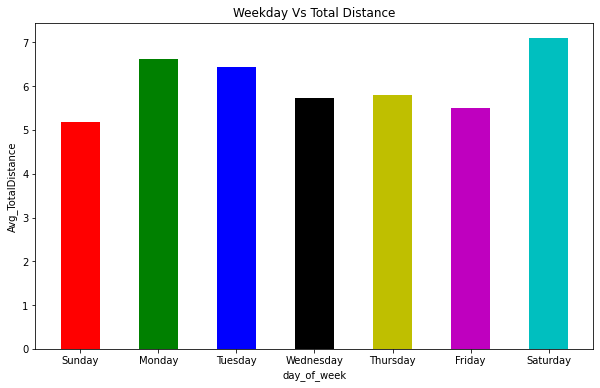

In [100]:
plt.figure(figsize=(10,6))
w = 0.5
x = activity_sleep_combined.groupby('day_of_week')['TotalDistance'].mean().reset_index()['day_of_week']
bar1 = np.arange(len(x))
Avg_TotalDistance = activity_sleep_combined.groupby('day_of_week')['TotalDistance'].mean()
my_colors = 'rgbkymc'
plt.bar(bar1,Avg_TotalDistance,w,color=list('rgbkymc'))
plt.xlabel('day_of_week')
plt.ylabel('Avg_TotalDistance')
plt.xticks(bar1, x)
plt.title("Weekday Vs Total Distance")
#plt.savefig('Plot2.png',format='png')
plt.show()

Let’s find out on average how much time consumers are seated or inactive on each weekday

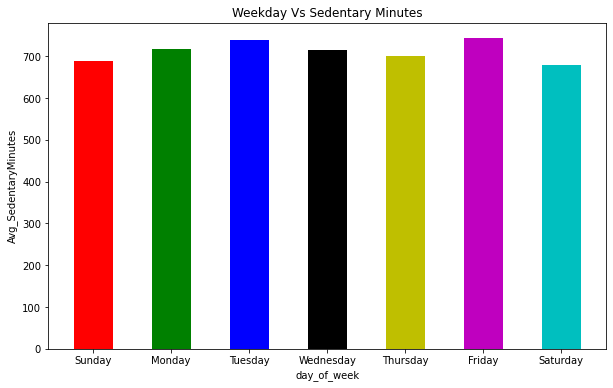

In [101]:
plt.figure(figsize=(10,6))
w = 0.5
x = activity_sleep_combined.groupby('day_of_week')['SedentaryMinutes'].mean().reset_index()['day_of_week']
bar1 = np.arange(len(x))
Avg_SedentaryMinutes = activity_sleep_combined.groupby('day_of_week')['SedentaryMinutes'].mean()
my_colors = 'rgbkymc'
plt.bar(bar1,Avg_SedentaryMinutes,w,color=list('rgbkymc'))
plt.xlabel('day_of_week')
plt.ylabel('Avg_SedentaryMinutes')
plt.xticks(bar1, x)
plt.title("Weekday Vs Sedentary Minutes")
#plt.savefig('Plot3.png',format='png')
plt.show()

Let’s find out How much calories are burned on each day of week

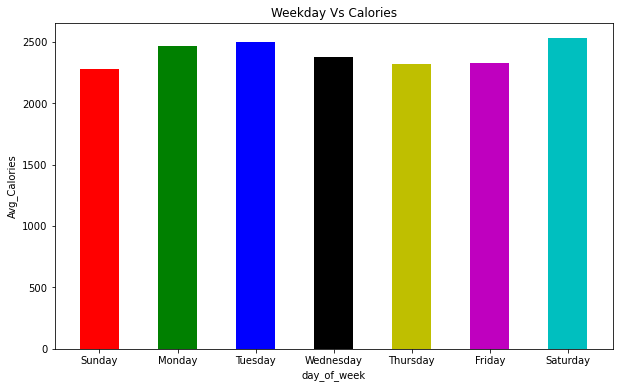

In [102]:
plt.figure(figsize=(10,6))
w = 0.5
x = activity_sleep_combined.groupby('day_of_week')['Calories'].mean().reset_index()['day_of_week']
bar1 = np.arange(len(x))
Avg_Calories = activity_sleep_combined.groupby('day_of_week')['Calories'].mean()
my_colors = 'rgbkymc'
plt.bar(bar1,Avg_Calories,w,color=list('rgbkymc'))
plt.xlabel('day_of_week')
plt.ylabel('Avg_Calories')
plt.xticks(bar1, x)
plt.title("Weekday Vs Calories")
#plt.savefig('Plot4.png',format='png')
plt.show()

Let’s determine sleeping habbits of consumers

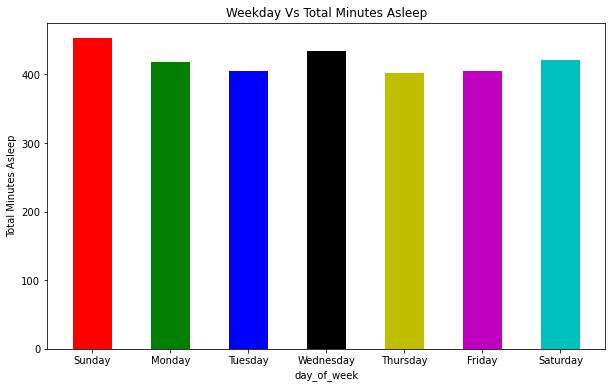

In [103]:
plt.figure(figsize=(10,6))
w = 0.5
x = activity_sleep_combined.groupby('day_of_week')['TotalMinutesAsleep'].mean().reset_index()['day_of_week']
bar1 = np.arange(len(x))
Avg_TotalMinutesAsleep = activity_sleep_combined.groupby('day_of_week')['TotalMinutesAsleep'].mean()
my_colors = 'rgbkymc'
plt.bar(bar1,Avg_TotalMinutesAsleep,w,color=list('rgbkymc'))
plt.xlabel('day_of_week')
plt.ylabel('Total Minutes Asleep')
plt.xticks(bar1, x)
plt.title("Weekday Vs Total Minutes Asleep")
#plt.savefig('Plot5.png',format='png')
plt.show()

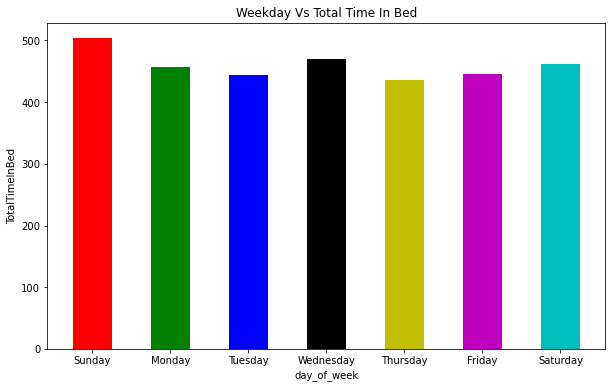

In [104]:
plt.figure(figsize=(10,6))
w = 0.5
x = activity_sleep_combined.groupby('day_of_week')['TotalTimeInBed'].mean().reset_index()['day_of_week']
bar1 = np.arange(len(x))
Avg_TotalTimeInBed = activity_sleep_combined.groupby('day_of_week')['TotalTimeInBed'].mean()
my_colors = 'rgbkymc'
plt.bar(bar1,Avg_TotalTimeInBed,w,color=list('rgbkymc'))
plt.xlabel('day_of_week')
plt.ylabel('TotalTimeInBed')
plt.xticks(bar1, x)
plt.title("Weekday Vs Total Time In Bed")
#plt.savefig('Plot6.png',format='png')
plt.show()

Let’s find out relationship between TotalMinutesAsleep and TotalTimeInBed

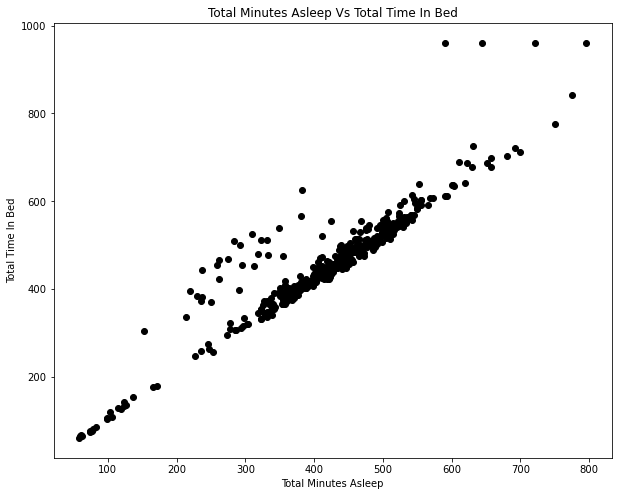

In [111]:
plt.figure(figsize=(10,8))
plt.scatter(x=activity_sleep_combined.TotalMinutesAsleep, y=activity_sleep_combined.TotalTimeInBed, c='k')
plt.xlabel("Total Minutes Asleep")
plt.ylabel("Total Time In Bed")
plt.title("Total Minutes Asleep Vs Total Time In Bed")
plt.savefig("Plot7.png", format='png')
plt.show()

What’s the relationship between steps taken in a day and sedentary minutes? How could this help inform the customer segments that we can market to? E.g. position this more as a way to get started in walking more? Or to measure steps that you’re already taking?

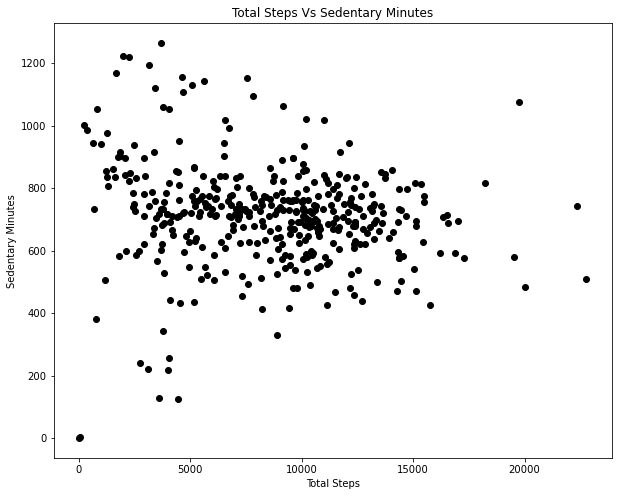

In [113]:
plt.figure(figsize=(10,8))
plt.scatter(x=activity_sleep_combined.TotalSteps, y=activity_sleep_combined.SedentaryMinutes, c='k')
plt.xlabel("Total Steps")
plt.ylabel("Sedentary Minutes")
plt.title("Total Steps Vs Sedentary Minutes")
plt.savefig("Plot8.png", format='png')
plt.show()

Let’s find out relationship between sitting or inactiveness and calories

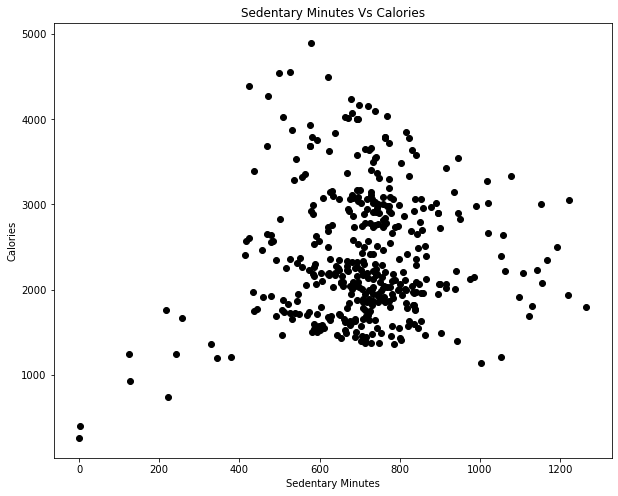

In [115]:
plt.figure(figsize=(10,8))
plt.scatter(x=activity_sleep_combined.SedentaryMinutes, y=activity_sleep_combined.Calories, c='k')
plt.xlabel("Sedentary Minutes")
plt.ylabel("Calories")
plt.title("Sedentary Minutes Vs Calories")
plt.savefig("Plot9.png", format='png')
plt.show()

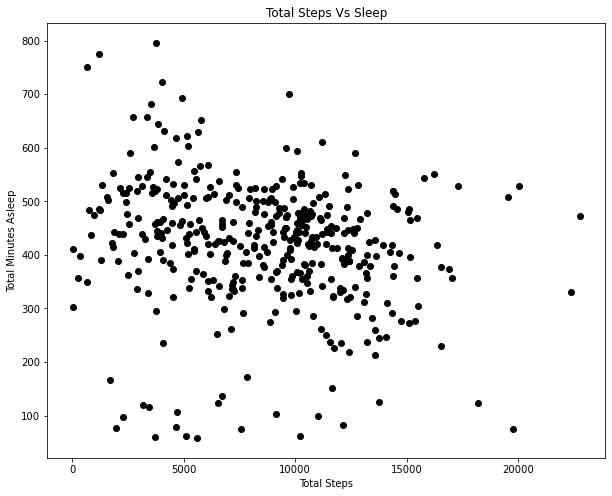

In [117]:
plt.figure(figsize=(10,8))
plt.scatter(x=activity_sleep_combined.TotalSteps, y=activity_sleep_combined.TotalMinutesAsleep, c='k')
plt.xlabel("Total Steps")
plt.ylabel("Total Minutes Asleep")
plt.title("Total Steps Vs Sleep")
plt.savefig("Plot10.png", format='png')
plt.show()

**STEP 5: EXPORT SUMMARY FILE FOR FURTHER ANALYSIS**

In [119]:
activity_sleep_summary = activity_sleep_combined.groupby('day_of_week')[['TotalSteps', 'TotalDistance', 'SedentaryMinutes', 'Calories', 
                                      'TotalMinutesAsleep', 'TotalTimeInBed']].mean().add_prefix('avg_')

In [120]:
activity_sleep_summary.to_csv('activity_sleep_summary.csv')

**Findings**

1. Total steps by consumers are highest on Saturdays and are lowest on Sundays. Total steps gradually reduce from Monday to Friday.
2. Total distance by consumers is highest on Saturdays and are lowest on Sundays. Total distance gradually decreases from Monday to Friday.
3. Highest calories are burnt on Saturdays and lowest on Sundays. Calories burnt gradually decreases from Monday to Friday.
4. Consumers Slept for largest minutes on Sundays and slept relatively less in weekdays.
5. Time in beds is largest minutes on Sundays and surprisingly second highest on Wednesday.
6. We found a positive correlation between average Total minutes asleep and Total time in bed.
7. We found slightly negative correlation between Total steps and Sedentary minutes. It means those who walk larger number of steps are less likely to be inactive or remain seated.
8. We also found a slightly negative correlation between Total steps and Total minutes asleep. It means those consumers who walk larger number of steps are sleeping lesser.

**Inference**

1. Consumer behavior changes in weekdays and in weekend. In weekdays activity and sleeping pattern is almost similar but on weekend the variations are high.
2. Walking more means less Sedentary minutes which means Walking for larger number of steps can reduce Sedentary minutes.
3. Walking for larger number of steps could reduce your sleep time.

**Recommendations**

1. Bellabeat could share these findings with consumers to spread awareness about daily activities and sleeping habits and at the same time to promote how Bellabeat products could benefit the consumers to streamline these habits to make them healthier.
2. Bellabeat could promote their membership program to consumers which offers a subscription-based membership program for users. 
3. Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals. This could create discipline and offer healthier life.
4. Bellbeat could use personized adds to promote their products to the targeted group and make them aware that how these products could be used for health benefits.